# Car Recommendation System

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv("data/fh4_cars.csv")
df

,images,name,class,pi,category,transmission,power_hp,weight_lbs,price,speed,handling,acceleration,breaking
0,https://www.kudosprime.com/fh4/images/cars/sid...,2017 Abarth 124 SPIDER,C,577,MODERN SPORTS CARS,RWD,165,"2,478","43,500",6.0,5.9,5.6,5.4
1,https://www.kudosprime.com/fh4/images/cars/sid...,2016 Abarth 695 BIPOSTO,B,607,HOT HATCH,FWD,186,"2,198","48,000",5.7,6.3,5.9,6.4
2,https://www.kudosprime.com/fh4/images/cars/sid...,1980 Abarth FIAT 131,D,449,CLASSIC RALLY,RWD,139,"2,161","38,000",5.5,4.7,5.5,4.5
3,https://www.kudosprime.com/fh4/images/cars/sid...,1968 Abarth 595 ESSEESSE,D,100,CULT CARS,RWD,28,"1,257","35,000",3.9,4.0,3.7,4.0
4,https://www.kudosprime.com/fh4/images/cars/sid...,2017 Acura NSX,S1,850,MODERN SUPERCARS,AWD,572,"3,803","170,000",7.4,7.6,9.6,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,https://www.kudosprime.com/fh4/images/cars/sid...,2017 VUHL 05RR,S2,926,EXTREME TRACK TOYS,RWD,385,"1,598","250,000",6.9,10.0,9.1,10.0
748,https://www.kudosprime.com/fh4/images/cars/sid...,2016 W Motors LYKAN HYPERSPORT,S2,907,HYPERCARS,RWD,780,"3,042","3,400,000",8.7,8.4,7.7,9.0
749,https://www.kudosprime.com/fh4/images/cars/sid...,1945 WILLYS MB JEEP,D,100,OFFROAD,AWD,60,"2,136","40,000",3.9,4.2,4.0,4.0
750,https://www.kudosprime.com/fh4/images/cars/sid...,2019 Zenvo TSR-S,S2,972,HYPERCARS,RWD,"1,177","3,411","1,200,000",8.9,9.9,8.2,10.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   images        752 non-null    object 
 1   name          752 non-null    object 
 2   class         752 non-null    object 
 3   pi            752 non-null    int64  
 4   category      752 non-null    object 
 5   transmission  752 non-null    object 
 6   power_hp      752 non-null    object 
 7   weight_lbs    752 non-null    object 
 8   price         752 non-null    object 
 9   speed         752 non-null    float64
 10  handling      752 non-null    float64
 11  acceleration  752 non-null    float64
 12  breaking      752 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 76.5+ KB


In [3]:
obj_cols = ["power_hp", "weight_lbs", "price"]
df[obj_cols] = df[obj_cols].apply(lambda x: x.str.replace(",", "").astype(int))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   images        752 non-null    object 
 1   name          752 non-null    object 
 2   class         752 non-null    object 
 3   pi            752 non-null    int64  
 4   category      752 non-null    object 
 5   transmission  752 non-null    object 
 6   power_hp      752 non-null    int64  
 7   weight_lbs    752 non-null    int64  
 8   price         752 non-null    int64  
 9   speed         752 non-null    float64
 10  handling      752 non-null    float64
 11  acceleration  752 non-null    float64
 12  breaking      752 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 76.5+ KB


In [4]:
df["class"] = df["class"].replace("c", "C")
df["class"].value_counts()

class
S1    168
A     163
D     125
C     116
B     113
S2     67
Name: count, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pi,752.0,671.831117,2.110764e+02,100.0,554.75,711.0,828.000,998.0
power_hp,752.0,421.134309,2.800556e+02,4.0,219.25,370.5,564.000,2399.0
weight_lbs,752.0,3202.171543,1.281139e+03,311.0,2533.50,3098.5,3654.750,16499.0
price,752.0,631708.776596,1.651079e+06,20000.0,60000.00,195000.0,340000.000,10000000.0
speed,752.0,6.727660,1.263249e+00,3.0,5.90,6.7,7.700,10.0
handling,752.0,6.382580,1.582545e+00,3.0,5.10,6.2,7.400,10.0
acceleration,752.0,6.540293,1.480035e+00,3.0,5.50,6.4,7.400,10.0
breaking,752.0,6.396277,1.779417e+00,3.2,4.80,6.1,7.725,10.0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

images          0
name            0
class           0
pi              0
category        0
transmission    0
power_hp        0
weight_lbs      0
price           0
speed           0
handling        0
acceleration    0
breaking        0
dtype: int64

<Axes: >

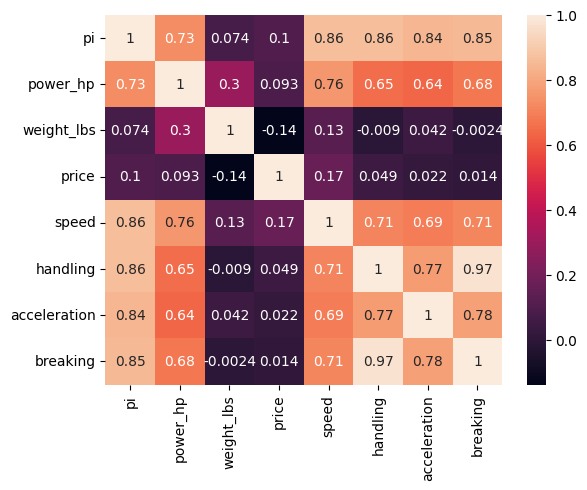

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [9]:
def check_plot(data):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data, bins=30)
    plt.title("Histogram")

    # Plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.ylabel("Variable quantiles")

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data)
    plt.title("Boxplot")

    plt.show()

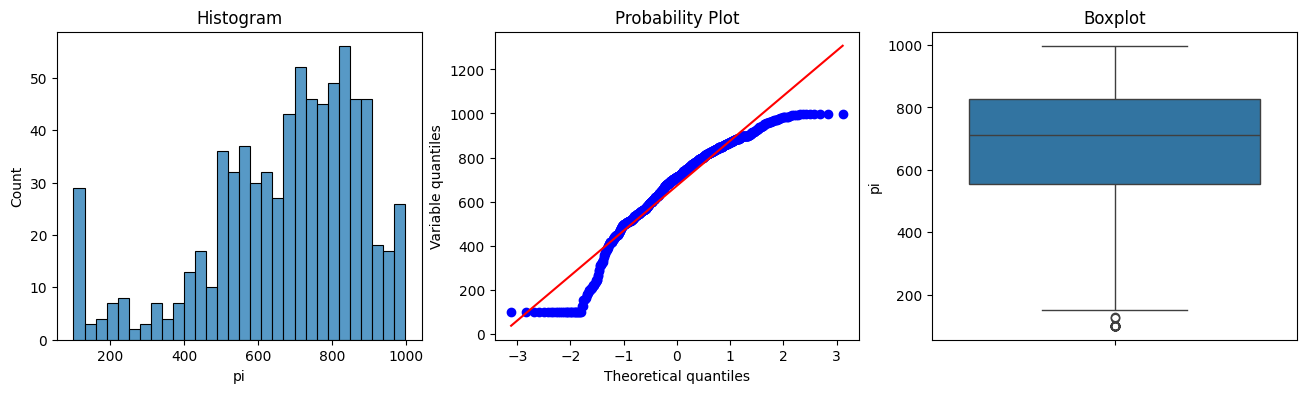

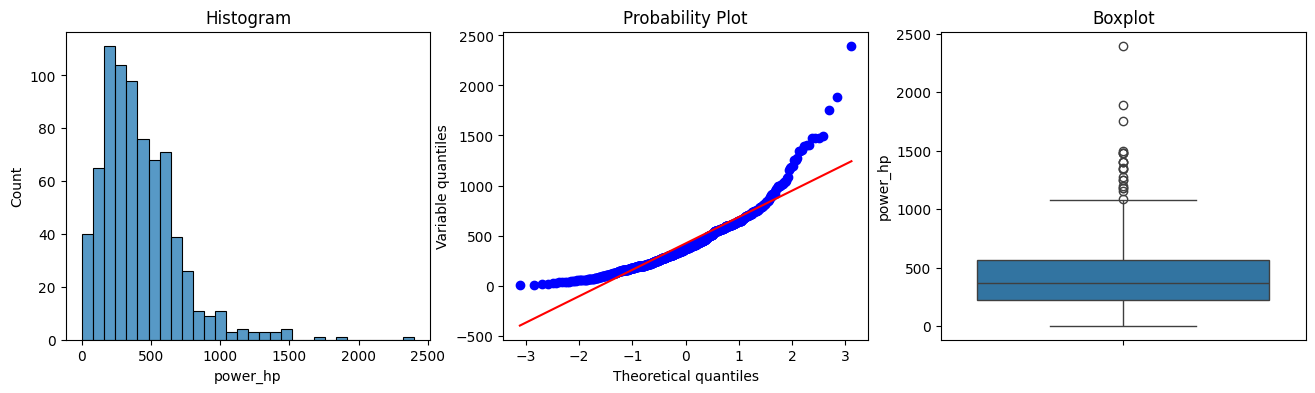

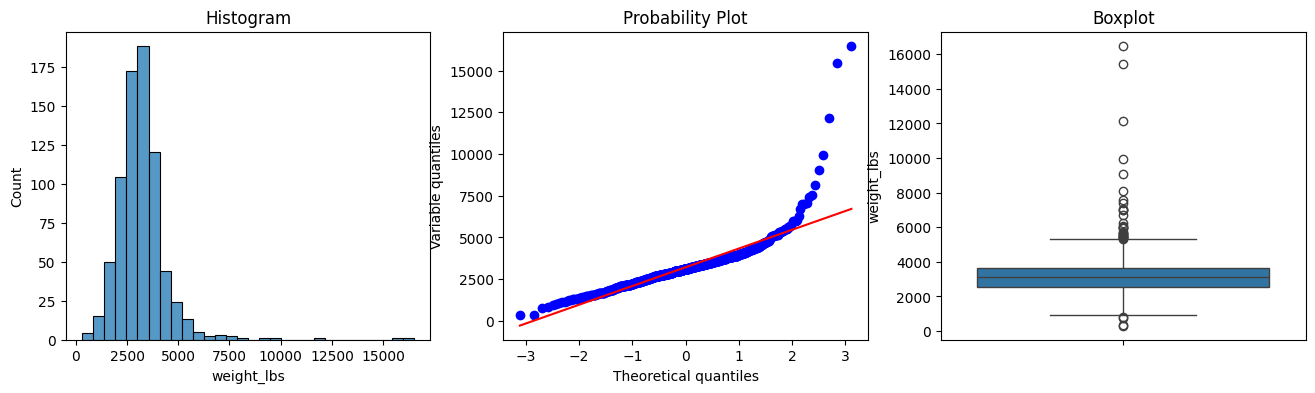

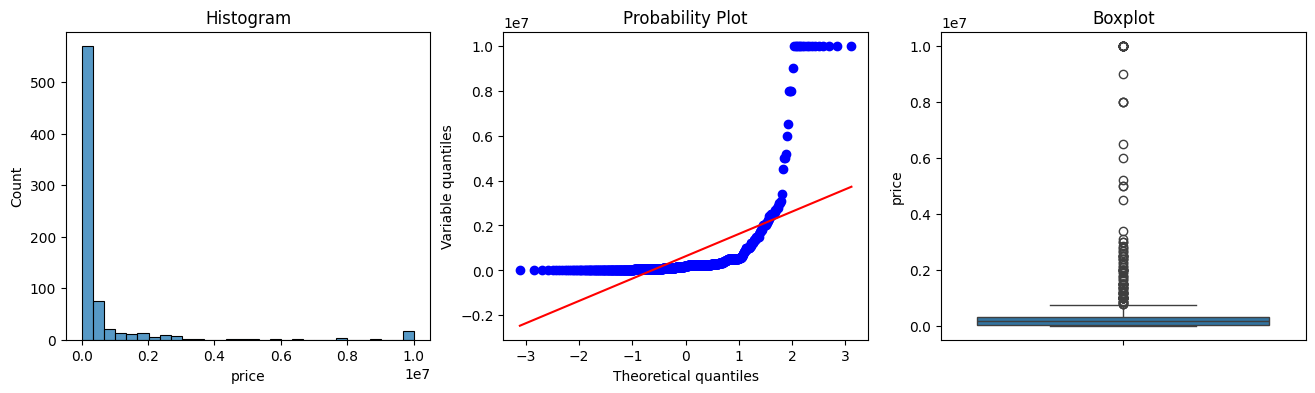

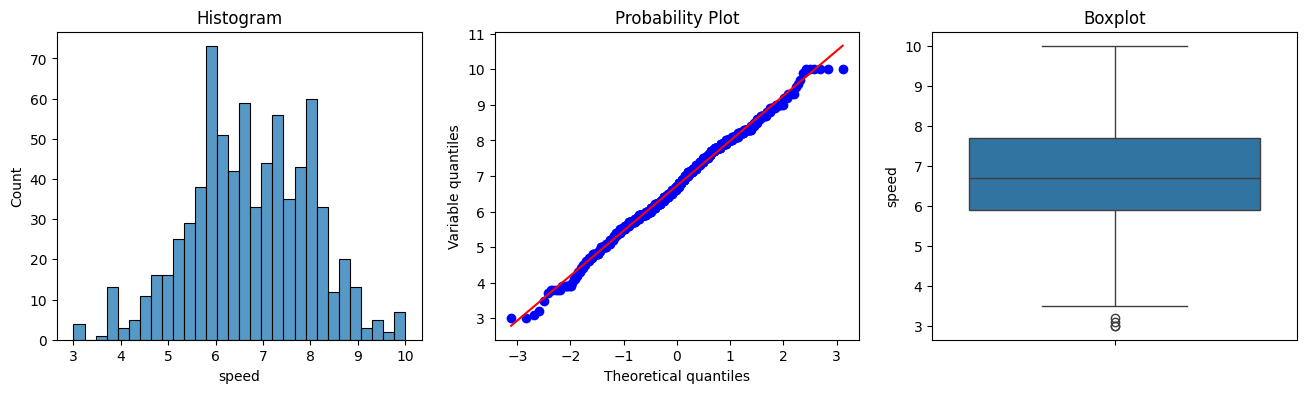

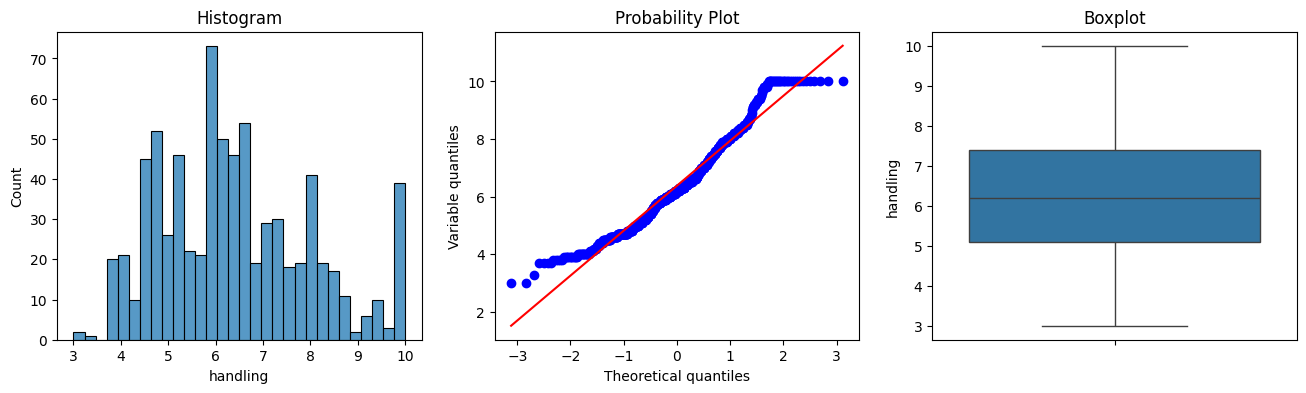

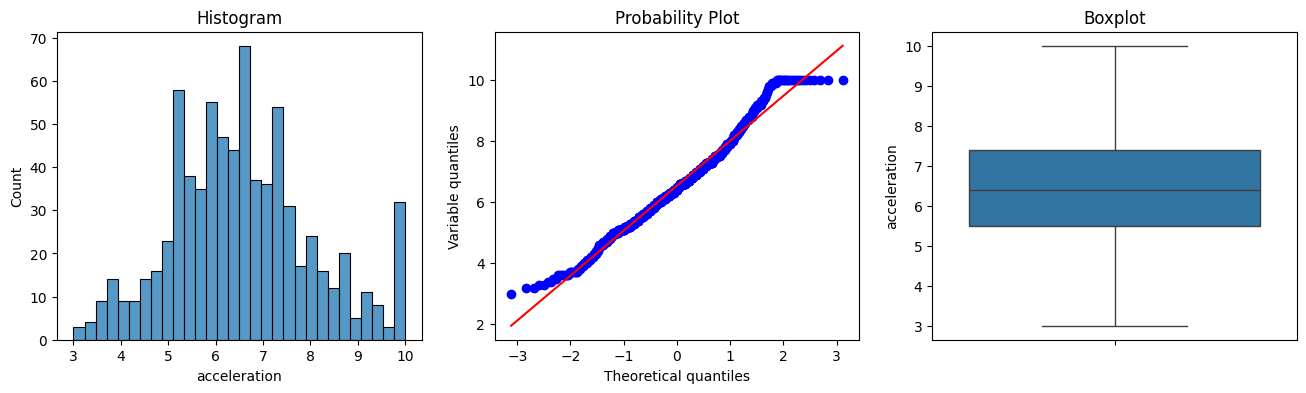

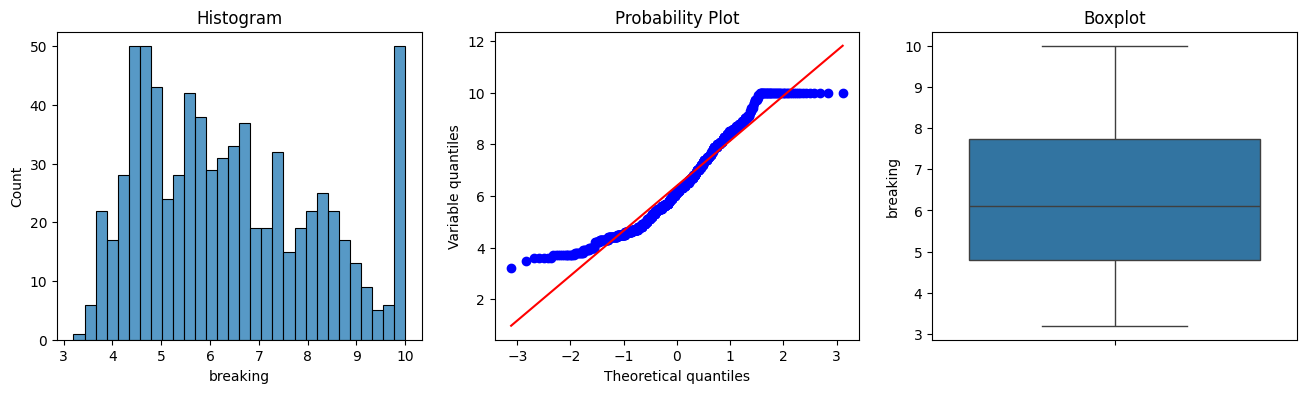

In [10]:
df_num_col = df.select_dtypes(include=[np.number]).columns

for col in df_num_col:
    check_plot(df[col])

In [11]:
df.to_csv("data/fh4_cars_cleaned.csv", index=False)